In [2]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

In [3]:
sp = pn.read_csv('./disconnection_interface.csv', header=0, names=['X', 'Y', 'Z', 'surface'])
sp['surface'] = 'surface1'


In [4]:
ori = pn.read_csv('./disconnection_normal.csv', header=0, names=['X', 'Y', 'Z', 'azimuth', 'dip', 'polarity'])
ori['surface'] = 'surface1'
ori['polarity'] = 1
ori['azimuth'] += 5

In [5]:
sp

,X,Y,Z,surface
0,0,0.0,0,surface1
1,10,0.2,0,surface1
2,11,0.0,0,surface1
3,150,50.0,-60,surface1
4,155,50.0,-60,surface1


In [6]:
ori

,X,Y,Z,azimuth,dip,polarity,surface
0,0,0.0,0,270,0,1,surface1
1,10,0.2,0,270,0,1,surface1
2,150,50.0,-60,270,90,1,surface1


In [7]:
geo_model = gp.create_model('Tutorial_ch1-1_Basics')
gp.init_data(geo_model, [-10,200.,-20, 75,-100,20],[50,50,50], 
    default_values=True)

Tutorial_ch1-1_Basics  2019-06-14 10:39

In [8]:
geo_model.set_default_surfaces()

,surface,series,order_surfaces,isBasement,color,id
0,surface1,Default series,1,False,#015482,1
1,surface2,Default series,2,True,#9f0052,2


In [9]:
geo_model.set_surface_points

<bound method DataMutation.set_surface_points of Tutorial_ch1-1_Basics  2019-06-14 10:39>

In [10]:
geo_model.set_surface_points(sp, update_surfaces=False)

In [11]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series
0,0,0.0,0,0.250100,0.419455,0.596874,surface1,Default series,1,1
1,10,0.2,0,0.282358,0.420100,0.596874,surface1,Default series,1,1
2,11,0.0,0,0.285584,0.419455,0.596874,surface1,Default series,1,1
3,150,50.0,-60,0.733971,0.580745,0.403326,surface1,Default series,1,1
4,155,50.0,-60,0.750100,0.580745,0.403326,surface1,Default series,1,1


In [12]:
ori[['azimuth', 'dip', 'polarity']].values

array([[270,   0,   1],
       [270,   0,   1],
       [270,  90,   1]])

In [13]:
for i in range(3):
    geo_model.add_orientations(ori.loc[i, 'X'], ori.loc[i, 'Y'], ori.loc[i, 'Z'], ori.loc[i, 'surface'],
                           orientation=ori.loc[i, ['azimuth', 'dip', 'polarity']],
                       )

In [14]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series
0,0.0,0.0,0.0,0.250100,0.419455,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
1,10.0,0.2,0.0,0.282358,0.420100,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
2,150.0,50.0,-60.0,0.733971,0.580745,0.403326,-1.000000e+00,9.998163e-13,1.000061e-12,90.0,270.0,1.0,surface1,Default series,1.0,1.0


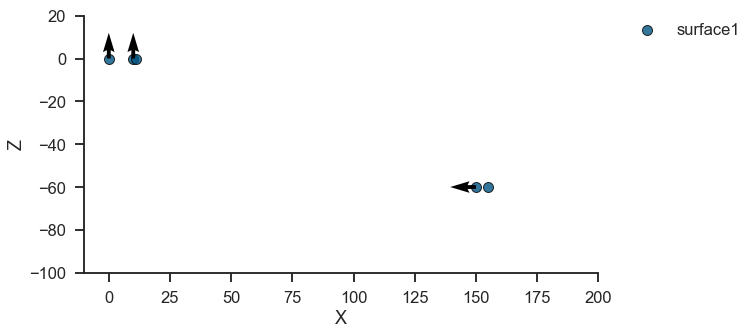

In [15]:
gp.plot.plot_data(geo_model)

In [15]:
gp.plot.plot_3D(geo_model)

closing vtk


In [16]:
gp.set_interpolation_data(geo_model)

Compiling theano function...
Compilation Done!


In [19]:
geo_model.grid.set_regular_grid([-10,200.,-20, 75,-100,20],[100,100,100])

In [23]:
geo_model.rescaling.set_rescaled_grid()
geo_model.update_to_interpolator()

In [30]:
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

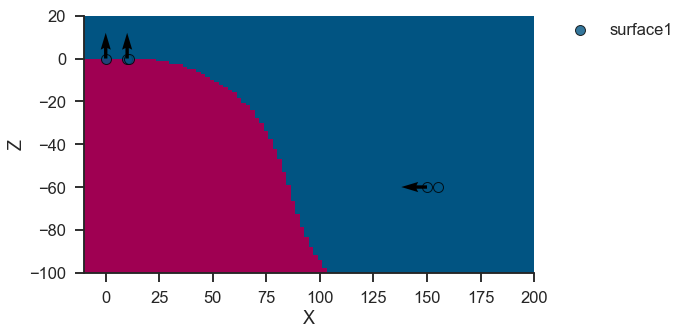

In [25]:
gp.plot.plot_section(geo_model, show_data=True)

In [26]:
vtk_obj = gp.plot.plot_3D(geo_model)

holding... Use vtk.resume to go back to the interactive window


In [28]:

geo_model.interpolator.theano_graph.a_T.get_value()

array(0.83824429)

In [ ]:
vtk_obj.resume()

In [53]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series
0,0.0,0.0,0.0,0.250100,0.419455,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
1,10.0,0.2,0.0,0.282358,0.420100,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
2,150.0,50.0,-60.0,0.733971,0.580745,0.403326,-1.000000e+00,9.998163e-13,1.000061e-12,90.0,270.0,1.0,surface1,Default series,1.0,1.0


In [57]:
geo_model.modify_orientations(2, polarity=.1)

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series
0,0.0,0.0,0.0,0.250100,0.419455,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
1,10.0,0.2,0.0,0.282358,0.420100,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
2,150.0,50.0,-60.0,0.733971,0.580745,0.403326,-1.000000e-01,9.999816e-13,1.000006e-12,90.0,270.0,0.1,surface1,Default series,1.0,1.0


In [58]:

#geo_model.interpolator.theano_graph.a_T.set_value(1.5)
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

In [59]:
vtk_obj.render_surfaces()